In [1]:
#series de tiempo. EL oreden de las observaciones si importa.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data = pd.read_csv("Gujarati223.csv")

In [3]:
data.head()

,DATE,GDPC1
0,1947-04-01,2027.639
1,1947-07-01,2023.452
2,1947-10-01,2055.103
3,1948-01-01,2086.017
4,1948-04-01,2120.450


In [4]:
data = data.rename(columns = {"DATE":"FECHA", "GDPC1":"PIB"})

In [5]:
data["LPIB"] = np.log(data["PIB"]) #logaritmo

In [6]:
data.dtypes

FECHA     object
PIB      float64
LPIB     float64
dtype: object

In [7]:
#transformar la fecha a formato fecha, nuve variable temporal
data["var_temp"] = sm.tsa.datetools.dates_from_str(data["FECHA"])

In [8]:
#otra forma
data["var_temp_1"] = pd.to_datetime(data["FECHA"])

In [9]:
data.dtypes

FECHA                 object
PIB                  float64
LPIB                 float64
var_temp      datetime64[ns]
var_temp_1    datetime64[ns]
dtype: object

In [10]:
#crear nueva variable temporal
data["var_tempo_alter"] = pd.date_range(start = "1947q2",
                                        end = "2008q1",
                                       freq = "QS") #QS: frecuencia igual al comienzo del trimestre

In [11]:
data.head()

,FECHA,PIB,LPIB,var_temp,var_temp_1,var_tempo_alter
0,1947-04-01,2027.639,7.614627,1947-04-01,1947-04-01,1947-04-01
1,1947-07-01,2023.452,7.612560,1947-07-01,1947-07-01,1947-07-01
2,1947-10-01,2055.103,7.628081,1947-10-01,1947-10-01,1947-10-01
3,1948-01-01,2086.017,7.643012,1948-01-01,1948-01-01,1948-01-01
4,1948-04-01,2120.450,7.659384,1948-04-01,1948-04-01,1948-04-01


In [12]:
#los index son la fila: colocar los index como variable temporal
timeseriesdata = data.set_index("var_temp_1")

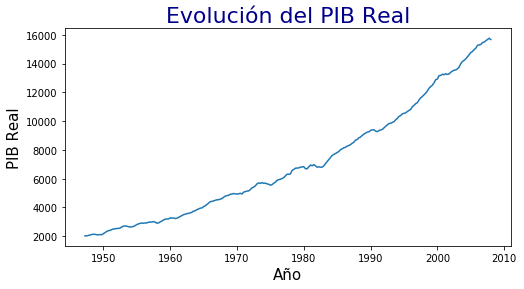

In [13]:
#gráficar
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_title("Evolución del PIB Real", fontsize = 22, 
             color = "darkblue")
ax.plot("PIB", data=timeseriesdata)
ax.set_xlabel("Año", fontsize = 15)
ax.set_ylabel("PIB Real", fontsize = 15)
plt.show()

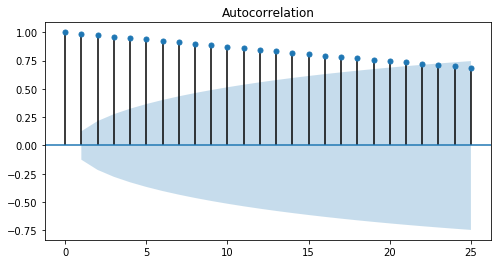

In [14]:
#identificación
fig, ax = plt.subplots(figsize = (8,4))
sm.graphics.tsa.plot_acf(timeseriesdata["LPIB"], lags = 25, ax = ax)
plt.show()
#serie no estacionaria porque decrece lentamente y adicionalmente está por fuera de la región sombreada (bandas de barlet: rezagos no significactivos)

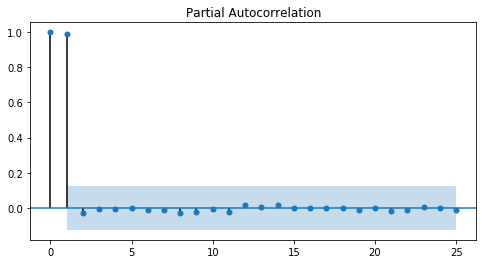

In [15]:
#sin embargo para capturar el efecto de cada rezago por aparte, ya que puede que el primer rezago incluya la influencia de los demás rezagos.
fig, ax = plt.subplots(figsize = (8,4))
sm.graphics.tsa.plot_pacf(timeseriesdata["LPIB"], lags = 25, ax = ax)
plt.show()
#el primer rezago siempre es 1, se observa que el primer rezago es el que tiene la autocorrelacion.

In [16]:
#tes de dickey-fuller aumentado (raíz unitaria)
#ho: la serie no es estacionaria
#H1: la serie es estacionaria
sm.tsa.stattools.adfuller(timeseriesdata["LPIB"]) #tsa: modulo  series de tiempo
#el p value es 0.6, es decir, no se rechaza la ho.

(-1.3081722249574301,
 0.625425266571843,
 3,
 240,
 {'1%': -3.4578942529658563,
  '5%': -2.8736593200231484,
  '10%': -2.573228767361111},
 -1514.2641823682843)

In [17]:
#diferenciamos la serie para volverla estacionaria
list(reversed(range(0,10)))


[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [18]:
timeseriesdata.head()

,FECHA,PIB,LPIB,var_temp,var_tempo_alter
var_temp_1,,,,,
1947-04-01,1947-04-01,2027.639,7.614627,1947-04-01,1947-04-01
1947-07-01,1947-07-01,2023.452,7.612560,1947-07-01,1947-07-01
1947-10-01,1947-10-01,2055.103,7.628081,1947-10-01,1947-10-01
1948-01-01,1948-01-01,2086.017,7.643012,1948-01-01,1948-01-01
1948-04-01,1948-04-01,2120.450,7.659384,1948-04-01,1948-04-01


In [19]:
timeseriesdata["diferencia"] = 0.0 #nueva variable con valores iniciales de cero
for i in reversed(range(len(timeseriesdata))): #inicia desde la última observación en la tabla ya que es la que tiene la fecha más reciente
                  timeseriesdata.iloc[i,5] = timeseriesdata.iloc[i,2] - timeseriesdata.iloc[i-1, 2] #primeras diferencias, fila actual menos fila anterior


In [20]:
timeseriesdata.head() # la diferencia más antigua está más calculada debido a que no tiene información anterior

,FECHA,PIB,LPIB,var_temp,var_tempo_alter,diferencia
var_temp_1,,,,,,
1947-04-01,1947-04-01,2027.639,7.614627,1947-04-01,1947-04-01,-2.044964
1947-07-01,1947-07-01,2023.452,7.612560,1947-07-01,1947-07-01,-0.002067
1947-10-01,1947-10-01,2055.103,7.628081,1947-10-01,1947-10-01,0.015521
1948-01-01,1948-01-01,2086.017,7.643012,1948-01-01,1948-01-01,0.014931
1948-04-01,1948-04-01,2120.450,7.659384,1948-04-01,1948-04-01,0.016372


In [21]:
timeseriesdata["DLPIB"] = timeseriesdata["LPIB"].diff() #otro metodo para la primera diferencia

In [22]:
timeseriesdata.head()

,FECHA,PIB,LPIB,var_temp,var_tempo_alter,diferencia,DLPIB
var_temp_1,,,,,,,
1947-04-01,1947-04-01,2027.639,7.614627,1947-04-01,1947-04-01,-2.044964,NaN
1947-07-01,1947-07-01,2023.452,7.612560,1947-07-01,1947-07-01,-0.002067,-0.002067
1947-10-01,1947-10-01,2055.103,7.628081,1947-10-01,1947-10-01,0.015521,0.015521
1948-01-01,1948-01-01,2086.017,7.643012,1948-01-01,1948-01-01,0.014931,0.014931
1948-04-01,1948-04-01,2120.450,7.659384,1948-04-01,1948-04-01,0.016372,0.016372


In [23]:
timeseriesdata[(timeseriesdata["diferencia"] != timeseriesdata["DLPIB"])] #extraer las filas para las cuales se cumple la condición 

,FECHA,PIB,LPIB,var_temp,var_tempo_alter,diferencia,DLPIB
var_temp_1,,,,,,,
1947-04-01,1947-04-01,2027.639,7.614627,1947-04-01,1947-04-01,-2.044964,NaN


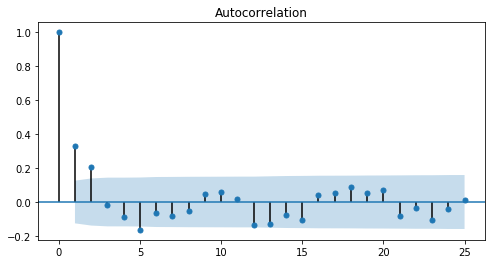

In [24]:
#analizar si la serie ya es estacionaria
fig, ax = plt.subplots(figsize = (8,4))
sm.graphics.tsa.plot_acf(timeseriesdata.iloc[1:,6], lags = 25, ax = ax) #toma todas las filas desde la 1, y toma la columna 6
plt.show()
#la primera observación es un NAN. Impide que se calcule la función de autocorrelación simple.
#no tenemso en cuenta la indexda con cero
#los rezagos importantes son el 1 y el 2

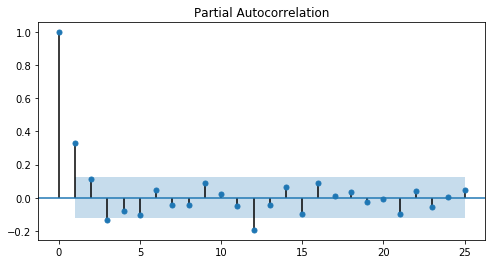

In [25]:
#función de autocorrelación parcial, muestra que solo el primer rezago es el significativo
fig, ax = plt.subplots(figsize = (8,4))
sm.graphics.tsa.plot_pacf(timeseriesdata.iloc[1:,6], lags = 25, ax = ax) #toma todas las filas desde la 1, y toma la columna 6
plt.show()

In [26]:
#test de dickey-fuller
sm.tsa.stattools.adfuller(timeseriesdata.iloc[1:,6]) #metodo iloc: extrae filas y columnas segun su posición, empezando por las filas
#p value es significativo, por tanto se rechaza la ho: la serie no es estacionaria

(-8.033114772666982,
 1.934432058770947e-12,
 2,
 240,
 {'1%': -3.4578942529658563,
  '5%': -2.8736593200231484,
  '10%': -2.573228767361111},
 -1508.499389140437)

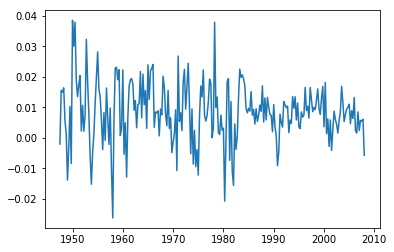

In [27]:
fig, ax =plt.subplots()
ax.plot("DLPIB", data = timeseriesdata)
plt.show()
#ya no se tiene tendencia, la varianza parece ser estable

In [28]:
#Fase de estimación (ARIMA(1,0,0)) o AR (1). AR, diferencias, MA
modeloARIMA_1_0_0 = sm.tsa.ARIMA(timeseriesdata["LPIB"], order = (1,0,0), freq = "QS")
results_ARIMA_1_0_0 = modeloARIMA_1_0_0.fit()
print(results_ARIMA_1_0_0.summary())

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

                              ARMA Model Results                              
Dep. Variable:                   LPIB   No. Observations:                  244
Model:                     ARMA(1, 0)   Log Likelihood                 712.876
Method:                       css-mle   S.D. of innovations              0.013
Date:                Mon, 11 May 2020   AIC                          -1419.751
Time:                        14:20:54   BIC                          -1409.260
Sample:                    04-01-1947   HQIC                         -1415.526
                         - 01-01-2008                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6378      1.011      8.542      0.000       6.656      10.620
ar.L1.LPIB     0.9999      0.000   8923.425      0.000       1.000       1.000
                                    Roots           

In [29]:
#ARIMA(2,0,0)
modeloARIMA_2_0_0 = sm.tsa.ARIMA(timeseriesdata["LPIB"], order = (2,0,0), freq = "QS")
results_ARIMA_2_0_0 = modeloARIMA_2_0_0.fit()
print(results_ARIMA_2_0_0.summary())

                              ARMA Model Results                              
Dep. Variable:                   LPIB   No. Observations:                  244
Model:                     ARMA(2, 0)   Log Likelihood                 772.411
Method:                       css-mle   S.D. of innovations              0.010
Date:                Mon, 11 May 2020   AIC                          -1536.821
Time:                        14:20:54   BIC                          -1522.833
Sample:                    04-01-1947   HQIC                         -1531.188
                         - 01-01-2008                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6370      0.968      8.922      0.000       6.740      10.534
ar.L1.LPIB     1.6212      0.002    800.326      0.000       1.617       1.625
ar.L2.LPIB    -0.6213      0.002   -306.617      0.0

In [30]:
#incluir el orden d. incluir el # de diferencias necesario para estacionarizar
#ARIMA. (MA = 2, de acuerdo a la  función de autocorrelación simple aplicada a la serie estacionarizada)
modeloARIMA_0_1_2 = sm.tsa.ARIMA(timeseriesdata["LPIB"], order = (0,1,2), freq = "QS") #no lleva AR, se diferencia una vez para volverla estacionaria, MA = 2 rezagos
resultadosARIMA_0_1_2 = modeloARIMA_0_1_2.fit()
print(resultadosARIMA_0_1_2.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.LPIB   No. Observations:                  243
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 799.942
Method:                       css-mle   S.D. of innovations              0.009
Date:                Mon, 11 May 2020   AIC                          -1591.885
Time:                        14:20:55   BIC                          -1577.912
Sample:                    07-01-1947   HQIC                         -1586.257
                         - 01-01-2008                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0084      0.001      9.589      0.000       0.007       0.010
ma.L1.D.LPIB     0.2904      0.063      4.601      0.000       0.167       0.414
ma.L2.D.LPIB     0.2241      0.060      3.72

In [31]:
# se utiiza el criterio de información, entre menor sea este mejor es el modelo
#existe una función que se llama autoarima para indetificar cuantos rezagos incluir y que modelo debe ser

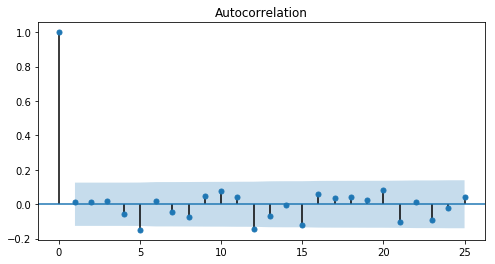

In [32]:
#verificación de diagnistico: 
#ver que los residuos no esten autocorrelacionados, sino que sean aleatorias
fig, ax = plt.subplots(figsize = (8,4))
sm.graphics.tsa.plot_acf(resultadosARIMA_0_1_2.resid, lags = 25, ax = ax)
plt.show()
#los residuos están dentro de las bandas de barlet, no están autocorrelacionados

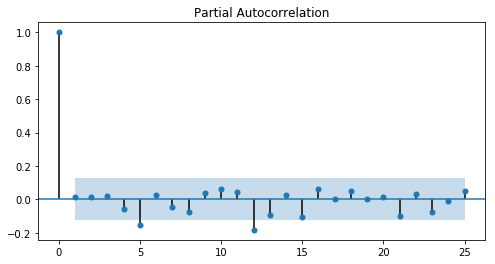

In [33]:
fig, ax = plt.subplots(figsize = (8,4))
sm.graphics.tsa.plot_pacf(resultadosARIMA_0_1_2.resid, lags = 25, ax = ax)
plt.show()
#la autocorrelación parcial muestra que los residuos no están autocorrelacionados

In [34]:
import statsmodels.stats.api as sms

In [35]:
#prueba de residuos aleatorios o autocorrelación: jungbox
sms.acorr_ljungbox(resultadosARIMA_0_1_2.resid, lags = 1)
#p valor es mayor a 0.05, no se rechaza la ho: no hay autocorrelación

(array([0.04039541]), array([0.84070945]))

In [36]:
#pronostico
resultadosARIMA_0_1_2.forecast(40)
#3 array de numpy: 1. predicción; 2. error estandar; 3. limite superior, limite inferior

(array([9.66370801, 9.66906536, 9.67742835, 9.68579134, 9.69415434,
        9.70251733, 9.71088032, 9.71924332, 9.72760631, 9.7359693 ,
        9.7443323 , 9.75269529, 9.76105828, 9.76942128, 9.77778427,
        9.78614726, 9.79451026, 9.80287325, 9.81123624, 9.81959924,
        9.82796223, 9.83632522, 9.84468822, 9.85305121, 9.8614142 ,
        9.8697772 , 9.87814019, 9.88650318, 9.89486618, 9.90322917,
        9.91159216, 9.91995516, 9.92831815, 9.93668114, 9.94504414,
        9.95340713, 9.96177012, 9.97013311, 9.97849611, 9.9868591 ]),
 array([0.00899386, 0.01468259, 0.02002791, 0.02422098, 0.02778839,
        0.03094726, 0.0338123 , 0.03645285, 0.03891464, 0.04122969,
        0.0434215 , 0.04550786, 0.04750267, 0.04941702, 0.05125994,
        0.05303885, 0.05476001, 0.05642869, 0.05804942, 0.05962612,
        0.06116219, 0.06266061, 0.06412402, 0.06555478, 0.06695497,
        0.06832647, 0.06967098, 0.07099002, 0.07228501, 0.07355719,
        0.07480775, 0.07603774, 0.07724815, 0.

In [37]:
#gráficar
pronostico = resultadosARIMA_0_1_2.forecast(40)

In [38]:
#extraer los componentes del objeto.
prediccion_puntual = pronostico[0]

In [39]:
intervalo_confianza = pronostico[2]

In [40]:
limites_inferiores= []
for i in range(len(intervalo_confianza)):
    limite_inferior = intervalo_confianza[i][0]
    limites_inferiores.append(limite_inferior)

In [41]:
limites_superiores= []
for i in range(len(intervalo_confianza)):
    limite_superior = intervalo_confianza[i][1]
    limites_superiores.append(limite_superior)

In [54]:
#organizarlo en data frame
datapredict = pd.DataFrame({"PredLPIB": prediccion_puntual,
                           "InferiorLPIB": limites_inferiores,
                           "SuperiorLPIB": limites_superiores})

In [55]:
#obtenemos el PIB y no el logaritmo
datapredict["PredPIB"] = np.exp(datapredict["PredLPIB"])
datapredict["InferiorPIB"] = np.exp(datapredict["InferiorLPIB"])
datapredict["SuperiorPIB"] = np.exp(datapredict["SuperiorLPIB"])



In [56]:
datapredict.head() #datos no indexados con fecha

,PredLPIB,InferiorLPIB,SuperiorLPIB,PredPIB,InferiorPIB,SuperiorPIB
0,9.663708,9.646080,9.681336,15736.025956,15461.067518,16015.874234
1,9.669065,9.640288,9.697843,15820.555546,15371.770238,16282.443329
2,9.677428,9.638174,9.716682,15953.417533,15339.314219,16592.106227
3,9.685791,9.638319,9.733264,16087.395303,15341.534419,16869.517779
4,9.694154,9.639690,9.748619,16222.498227,15362.582107,17130.547904


In [57]:
#indexar con fecha
fecha = pd.date_range("2008q2", periods = 40, freq = "QS")

In [58]:
datapredict.set_index(fecha, inplace = True) #inplace es para que realice el cambio de una vez sin necesidad de crear otro objeto

In [59]:
datapredict.head()

,PredLPIB,InferiorLPIB,SuperiorLPIB,PredPIB,InferiorPIB,SuperiorPIB
2008-04-01,9.663708,9.646080,9.681336,15736.025956,15461.067518,16015.874234
2008-07-01,9.669065,9.640288,9.697843,15820.555546,15371.770238,16282.443329
2008-10-01,9.677428,9.638174,9.716682,15953.417533,15339.314219,16592.106227
2009-01-01,9.685791,9.638319,9.733264,16087.395303,15341.534419,16869.517779
2009-04-01,9.694154,9.639690,9.748619,16222.498227,15362.582107,17130.547904


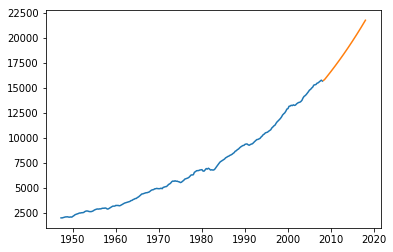

In [60]:
#graficar


ax.plot("PIB", data = timeseriesdata)
ax.plot("PredPIB", data = datapredict)
plt.show()

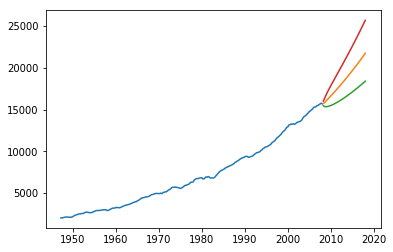

In [67]:
#gráficar con limites superiores e inferiores
fig, ax = plt.subplots()
ax.plot("PIB", data = timeseriesdata)
ax.plot("PredPIB", data = datapredict)
ax.plot("InferiorPIB", data = datapredict)
ax.plot("SuperiorPIB", data = datapredict)
plt.show()

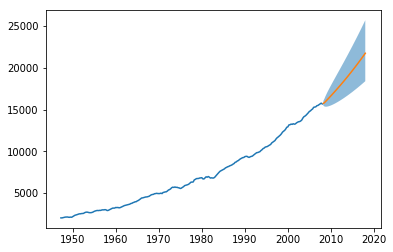

In [68]:
#gráfico con región sombreada: intervalo de confianza
fig, ax = plt.subplots()
ax.plot("PIB", data = timeseriesdata)
ax.plot("PredPIB", data = datapredict)
ax.fill_between(datapredict.index, datapredict["InferiorPIB"], datapredict["SuperiorPIB"], alpha = 0.5)
plt.show()

In [73]:
data_real = pd.read_csv("Gujarati223V.csv")
data_real = data_real.rename(columns = {"DATE":"fecha",
                                       "GDPC1":"PIB_Real"})
data_real["variable_tempo"]  = sm.tsa.datetools.dates_from_str(data_real["fecha"]) #crea variable temporal
data_real = data_real.set_index("variable_tempo") #asigna la variable temporal como index


In [84]:
data_real.head()

,fecha,PIB_Real
variable_tempo,,
2008-01-01,2008-01-01,15671.383
2008-04-01,2008-04-01,15752.308
2008-07-01,2008-07-01,15667.032
2008-10-01,2008-10-01,15328.027
2009-01-01,2009-01-01,15155.940


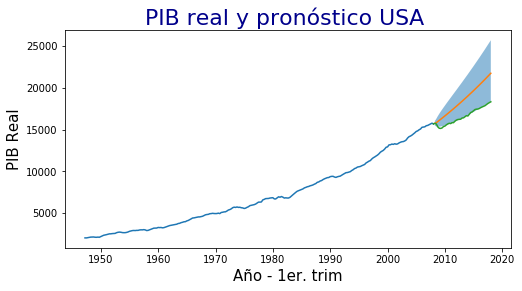

In [79]:
#gráfico con región sombreada: intervalo de confianza y con datos reales para los 40 trimestres
fig, ax = plt.subplots(figsize = (8,4))
ax.set_title("PIB real y pronóstico USA ", fontsize = 22, 
             color = "darkblue")
ax.plot("PIB", data = timeseriesdata)
ax.plot("PredPIB", data = datapredict)
ax.set_xlabel("Año - 1er. trim", fontsize = 15)
ax.fill_between(datapredict.index, datapredict["InferiorPIB"], datapredict["SuperiorPIB"], alpha = 0.5)
ax.plot("PIB_Real", data = data_real)
ax.set_ylabel("PIB Real", fontsize = 15)
plt.show()


In [98]:
#desviación del pórnostico
prediccion = datapredict.iloc[-1,:]["PredPIB"] #extrae la última observación de la tabla para esa columna


In [103]:
verdadero = data_real.iloc[-1:]["PIB_Real"] #extrae la última observación de la tabla para esa columna

In [104]:
verdadero.head()

variable_tempo
2018-01-01    18323.963
Name: PIB_Real, dtype: float64

In [107]:
prediccion - verdadero

variable_tempo
2018-01-01    3414.948741
Name: PIB_Real, dtype: float64